<a href="https://colab.research.google.com/github/DilshanBotheju/HandWrittenNumberRecognizer/blob/main/HandWrittenLetterRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
!pip install tensorflow scikit-learn

In [145]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [146]:
# Loading the dataset
minst = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = minst.load_data()


In [147]:
x_train.shape

(60000, 28, 28)

Exception ignored in: <function _xla_gc_callback at 0x7b0e86e73400>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


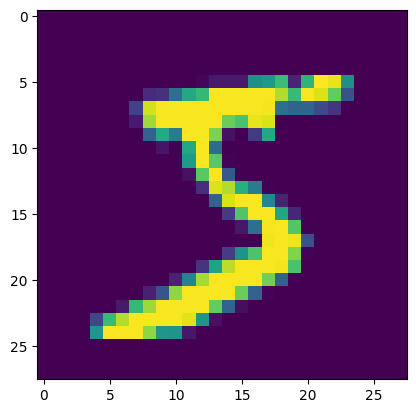

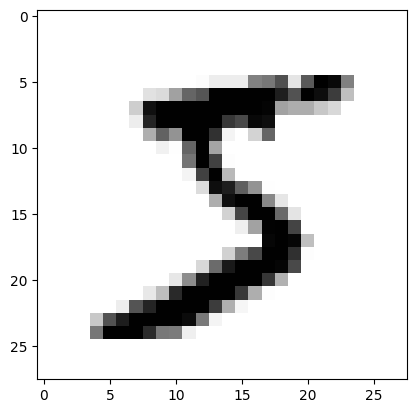

In [148]:
# Checking the dataset
plt.imshow(x_train[0])
plt.show()

# Changing configuration
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [149]:
# Checking values before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Image preprocessing

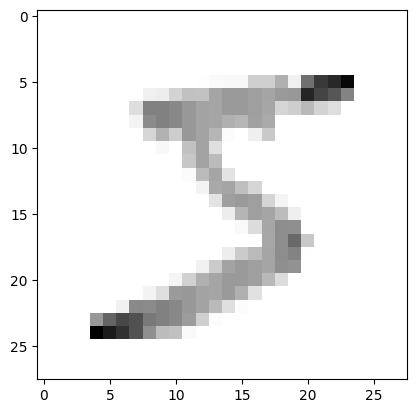

In [150]:
# Normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [151]:
# Checking pixels
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [152]:
# Checking the label
print(y_train[0])

5


In [153]:
# Reshaping the images
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("Training sample dimension:", x_train.shape)
print("Testing sample dimension:", x_test.shape)

Training sample dimension: (60000, 28, 28, 1)
Testing sample dimension: (10000, 28, 28, 1)


# Model Development

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [155]:
# Create the CNN model
model = Sequential()

# First CNN layer
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten layer to convert 2D to 1D
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))

# Output layer with 10 units (for 10 classes)
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
# Getting model summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Compiling thge model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model
model.fit(x_train,y_train, epochs=10, validation_split=0.3)
test_predictions = model.predict(x_test)

# Convert the predictions to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Generate a classification report
report = classification_report(y_test, predicted_labels, target_names=[str(i) for i in range(10)])
print(report)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 66ms/step - accuracy: 0.4326 - loss: 1.5881 - val_accuracy: 0.9294 - val_loss: 0.2670
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 142s 67ms/step - accuracy: 0.8499 - loss: 0.5251 - val_accuracy: 0.9625 - val_loss: 0.1437
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.8999 - loss: 0.3810 - val_accuracy: 0.9705 - val_loss: 0.1108
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.9190 - loss: 0.3087 - val_accuracy: 0.9729 - val_loss: 0.1127
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.9310 - loss: 0.2673 - val_accuracy: 0.9768 - val_loss: 0.0875
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step - accuracy: 0.9366 - loss: 0.2490 - val_accuracy: 0.9791 - val_loss: 0.0838
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 139s 64ms/step - accuracy: 0.9440 - loss: 0.2184 - val_accuracy: 0.9793 - val_loss: 0.0848
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0